In [246]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [247]:
#Ignore warning messages
warnings.filterwarnings('ignore')

# Data Collection and Preprocessing

In [248]:
# loading the csv data to a Pandas DataFrame
diabete_data = pd.read_csv('diabetes.csv')
diabete_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,MaritalStatus,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,Yes,33.6,0.627,50,1
1,1,85,66.0,29,0,No,26.6,0.351,31,0
2,8,183,64.0,0,0,No,23.3,0.672,32,1
3,6,111,NaN,39,452,Yes,NaN,0.275,41,1
4,1,89,66.0,23,94,Yes,28.1,0.167,21,0


In [249]:
# number of rows and columns in the dataset
diabete_data.shape

(808, 10)

In [250]:
# getting summary about the dataset
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               808 non-null    int64  
 1   Glucose                   808 non-null    int64  
 2   BloodPressure             778 non-null    float64
 3   SkinThickness             808 non-null    int64  
 4   Insulin                   808 non-null    int64  
 5   MaritalStatus             808 non-null    object 
 6   BMI                       781 non-null    float64
 7   DiabetesPedigreeFunction  808 non-null    float64
 8   Age                       808 non-null    int64  
 9   Outcome                   808 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 63.2+ KB


In [251]:
# number of missing values
diabete_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness               False
Insulin                     False
MaritalStatus               False
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [252]:
# checking for missing values in dataset
diabete_data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               30
SkinThickness                0
Insulin                      0
MaritalStatus                0
BMI                         27
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [253]:
# find duplicate rows
duplicate_row = diabete_data[diabete_data.duplicated()]
print("Duplicates: ", duplicate_row.shape)

Duplicates:  (4, 10)


In [254]:
# delete duplicate rows
diabete_data_without_duplicate = diabete_data.drop_duplicates()

In [255]:
# verify rows
duplicate_row = diabete_data_without_duplicate[diabete_data_without_duplicate.duplicated()]
print("rows: ", duplicate_row.shape)

rows:  (0, 10)


In [256]:
# checking for missing values in dataset
diabete_data_without_duplicate.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               29
SkinThickness                0
Insulin                      0
MaritalStatus                0
BMI                         26
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

<AxesSubplot:>

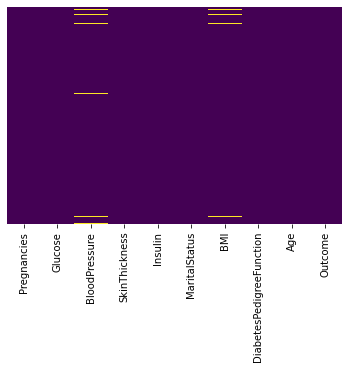

In [257]:
#Visualize null values in dataset
sns.heatmap(diabete_data_without_duplicate.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [258]:
#statistical measures about the data
diabete_data_without_duplicate.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,804.000000,804.000000,775.000000,804.000000,804.000000,778.000000,804.000000,804.000000,804.000000
mean,3.865672,121.522388,69.123871,20.863184,84.881841,32.003599,0.471281,33.236318,0.361940
std,3.350339,32.029691,19.296547,15.972304,121.098612,7.861228,0.328645,11.795956,0.480861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,40.500000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.575000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [259]:
#Replace Blood Pressure missing values with its mean
mean_value_totalBloodPressure = diabete_data_without_duplicate['BloodPressure'].mean()
diabete_data_without_duplicate['BloodPressure'] = diabete_data_without_duplicate['BloodPressure'].fillna(mean_value_totalBloodPressure)

In [260]:
#Replaces BMI missing values with its mean
mean_value_BMI = diabete_data_without_duplicate['BMI'].mean()
diabete_data_without_duplicate['BMI'] = diabete_data_without_duplicate['BMI'].fillna(mean_value_BMI)

In [261]:
#Renames the cleaned dataset as the finalDataSet
finalDataset = diabete_data_without_duplicate.reset_index(drop=True)

In [262]:
# verify missing values empty in dataset
finalDataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
MaritalStatus               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

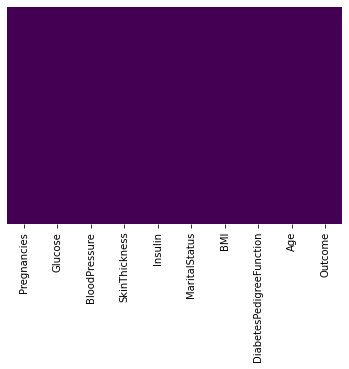

In [263]:
#Visualizing the dataset
sns.heatmap(finalDataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

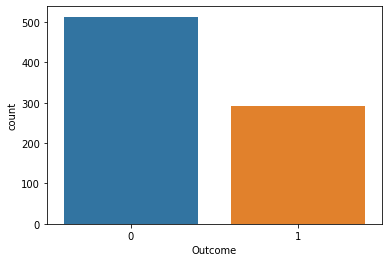

In [264]:
#plotting the outcome
sns.countplot(x='Outcome',data=finalDataset)

In [265]:
#Drops Column that is not helpful for the analysis
finalDataset.drop(['MaritalStatus'], axis=1, inplace=True)

In [266]:
#Describe the cleaned dataset
finalDataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,3.865672,121.522388,69.123871,20.863184,84.881841,32.003599,0.471281,33.236318,0.361940
std,3.350339,32.029691,18.944900,15.972304,121.098612,7.732913,0.328645,11.795956,0.480861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.242500,24.000000,0.000000
50%,3.000000,118.000000,70.000000,23.000000,40.500000,32.003599,0.370500,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.325000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [267]:
finalDataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,0,33.600000,0.627,50,1
1,1,85,66.000000,29,0,26.600000,0.351,31,0
2,8,183,64.000000,0,0,23.300000,0.672,32,1
3,6,111,69.123871,39,452,32.003599,0.275,41,1
4,1,89,66.000000,23,94,28.100000,0.167,21,0


In [268]:
#Dependent veriable
finalDataset['Outcome'].unique()

array([1, 0], dtype=int64)

In [269]:
# checking the distribution of Condition Variable
finalDataset['Outcome'].value_counts()

0    513
1    291
Name: Outcome, dtype: int64

Splitting the Features and Target

In [270]:
x_features = finalDataset
x_features = finalDataset.drop(columns='Outcome', axis=1)

In [271]:
X = x_features
y = finalDataset['Outcome']

In [272]:
#1st of line of the dataframe
X[0:1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0,33.6,0.627,50


In [366]:
# Split data 70%-20% into training set and test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2)

# Model Training

Logistic Regression

In [317]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver="liblinear",random_state=42)
log_model.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

Model Evaluation

Accuracy Score

In [318]:
from sklearn.metrics import classification_report

log_pred = log_model.predict(X_test)
print(classification_report(Y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       109
           1       0.74      0.71      0.73        52

    accuracy                           0.83       161
   macro avg       0.80      0.80      0.80       161
weighted avg       0.82      0.83      0.83       161



In [319]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy:', accuracy_score(Y_test, log_pred))
print("Overall Precision:",precision_score(Y_test, log_pred))
print("Overall Recall:",recall_score(Y_test, log_pred))

Accuracy: 0.8260869565217391
Overall Precision: 0.74
Overall Recall: 0.7115384615384616


In [320]:
input_true = (6,148,72,35,0,33.6,0.627,50)
input_false = (4,110,92,0,0,37.6,0.191,30)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_true)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

log_prediction = log_model.predict(input_data_reshaped)
print(log_prediction)


if (log_prediction[0]== 0):
  print('The Person does not have Diabetes')
else:
  print('The Person have Diabetes')

[1]
The Person have Diabetes
